*George Calvert*, CPSC 322, Fall 2023, Final Project

# Data Discovery:

For this project I will be using two different tables of data. The first will be inpatient charges which contains the locaion of a hospital, the service provided to the paitient, and finally the average cost for the service. The second is Hospital General information which contains the location of a hospital and then ratings for different services they provide. For classification, I will be developing models to predict the region in which a certain hospital resides. This model will be trained using both continous and categorical data. The categorical data will include the Hospital;s overall rating, name, and ownership. The continous data will be the average total amount of money patients paid when visiting. This will be calculated by finding the mean of the payements for each of the hospitals intances in the dataset, ignoring which service the individual patient paid for 

### The Data Sets:

* The first data set is *[Inpatient Charges](https://www.kaggle.com/datasets/speedoheck/inpatient-hospital-charges)*.

    Which is described as:
    > Variation of hospital charges in the various hospitals in the US for the top 100 diagnoses.
    > This dataset will show you how price for the same diagnosis and the same treatment and in the same city can vary differently across different providers. It might help you or your loved one find a better hospital for your treatment. You can also analyze to detect fraud among providers.
    
    The attributes in this dataset are:

    * DRG Definition = Nominal - Service/Condition for being in hospital
    * Provider Id = Nominal - Id for the specific hospital
    * Provider Name = Nominal - Name of the Hospital 
    * Provider Street Address = Nominal - Address of the Hospital
    * Provider City = Nominal - City Hospital is Located
    * Provider State = Nominal - State Hospital is Located
    * Provider ZIP Code = Nominal - Zip Code of Hospital
    * Hospital Referall Region Description - Nominal - City/Region the Hospital provides for. Ex: "CA - Los Angeles"
    * Total number of Discharges = Interval - Discharges for the given condition in a certain hospital
    * Average Covered Charges = Interval - Amount of Money Covered for the given condition in a certain hospital
    * Average Total Payments = Interval - Average total payment for service

* The second data set is *[Hospital General Information](https://www.kaggle.com/datasets/center-for-medicare-and-medicaid/hospital-ratings?rvi=1)*.

    Which is described as:
    > The official datasets used on the Medicare.gov Hospital Compare Website provided by the Centers for Medicare & Medicaid Services. These data allow you to compare the quality of care at over 4,000 Medicare-certified hospitals across the country.

    The attributes in this data set are:
    * Provider ID = Nominal - Id for the specific hospital
    * Hospital Name = Nominal - Name of the Hospital
    * Address = Nominal - Address of the Hospital
    * City = Nominal - City Hospital is Located
    * State = Nominal - State Hospital is Located
    * ZIP Code = Nominal - Zip Code of Hospital
    * County Name = Nominal - County for specific Hospital
    * Phone Number = Nominal - Phone Number for a Hospital
    * Hospital Type = Nominal - Type of Hospital (ie. Acute Care, Critical Access)
    * Hospital Ownership = Nominal - Type of Ownership (ie. Voluntary Non-Profit, Proprietary)
    * Emergency Services = Interval - y or n if they have emergency service
    * Meets criteria for meaningful use of EHRs = Interval - y or n for having an Electronic Health record
    * Hospital overall rating = Ordinal - Rating of Hospital 1-5
    * Hospital overall rating footnote = Nominal - Explanation for rating 
    * Mortality national comparison = Nominal - Comparing to national average for Mortality (ie. Same as national average, Below Average, Above Average)
    * Mortality national comparison footnote = Nominal - Explanation
    * Safety of care national comparison = Nominal - Comparing to national average for Safety of Care (ie. Same as national average, Below Average, Above Average)
    * Safety of care national comparison footnote = Nominal - Explanation
    * Readmission national comparison = Nominal - Comparing to national average for readmission (ie. Same as national average, Below Average, Above Average)
    * Readmission national comparison footnote = Nominal - Explanation
    * Patient experience national comparison = Nominal - Comparing to national average for Patient Experience (ie. Same as national average, Below Average, Above Average)
    * Patient experience national comparison footnote = Nominal - Explanation 
    * Effectiveness of care national comparison = Nominal - Comparing to national average for Effectiveness of Care(ie. Same as national average, Below Average, Above Average)
    * Effectiveness of care national comparison footnote = Nominal - Explanation
    * Timeliness of care national comparison = Nominal - Comparing to national average for Timliness of care (ie. Same as national average, Below Average, Above Average)
    * Timeliness of care national comparison footnote = Nominal Explanation
    * Efficient use of medical imaging national comparison = Comparing to national average for Efficient use of medical imaging (ie. Same as national average, Below Average, Above Average)
    * Efficient use of medical imaging national comparison = Nominal - Explanation



I will joining these two data sets together, matching on the Hospital's name, and address. Then I will combine each reoccuring hospital into one single instance of a row,computing an average total cost for each hospital, then I will create a new attribute "region" which will be based on the state in which the hospital resides. I will then be cleaning the joined table by removing rows with missing values 

# Exploratory Analysis and Visualizations

### Loading Libraries and Data Sets

In [160]:
from decision_tree import *
from data_table import *
from data_learn import *
from data_eval import *
from data_util import *

In [161]:
inpatient_charges_table = DataTable(["DRG Definition","Provider Id","Hospital Name","Address","City",
                                    "State","ZIP Code","Hospital Referral Region Description", "Total Discharges" , 
                                    "Average Covered Charges" , "Average Total Payments ","Average Medicare Payments"])

hospital_info_table = DataTable(["Provider ID","Hospital Name","Address","City","State","ZIP Code","County Name",
                                "Phone Number","Hospital Type","Hospital Ownership","Emergency Services",
                                "Meets criteria for meaningful use of EHRs","Hospital overall rating","Hospital overall rating footnote",
                                "Mortality national comparison","Mortality national comparison footnote",
                                "Safety of care national comparison","Safety of care national comparison footnote",
                                "Readmission national comparison","Readmission national comparison footnote",
                                "Patient experience national comparison","Patient experience national comparison footnote",
                                "Effectiveness of care national comparison","Effectiveness of care national comparison footnote",
                                "Timeliness of care national comparison","Timeliness of care national comparison footnote",
                                "Efficient use of medical imaging national comparison","Efficient use of medical imaging national comparison footnote"])                               
inpatient_charges_table.load("inpatientCharges.csv")
hospital_info_table.load("Hospital General Information UTF-8.csv")

### Combining Tables on Hospital Name, Address, City, State, ZIP Code
* Not including non-matching rows

In [162]:
combined_table = DataTable.combine(inpatient_charges_table, hospital_info_table, ["Hospital Name", "Address", "City", "State", "ZIP Code"])
del combined_table[0]

### Data Set Facts:

In [163]:
print("Number Instances: ", combined_table.row_count())
print("Number Columns: ", combined_table.column_count())

Number Instances:  106683
Number Columns:  35


In [164]:
print("Number of States Represented: ", len(distinct_values(combined_table, 'State')))
print("Number of Distinct Hospitals: ", len(distinct_values(combined_table, "Hospital Name")))
print("Number Conditions Represented: ", len(distinct_values(combined_table, "DRG Definition")))

Number of States Represented:  51
Number of Distinct Hospitals:  2059
Number Conditions Represented:  100


### Visualizations

*Distribution of Hospital Ratings*

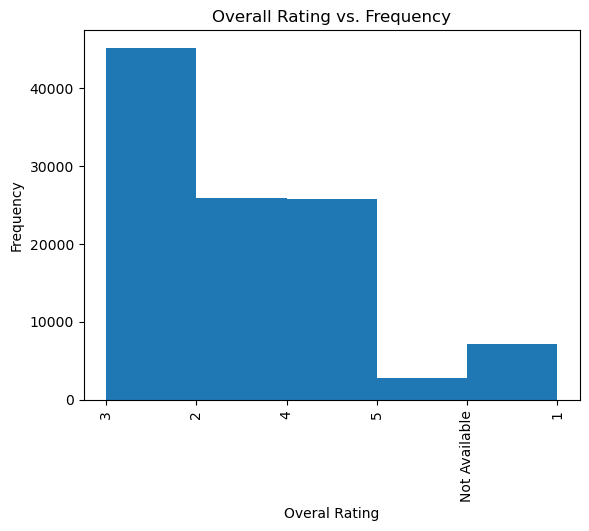

<Figure size 12000x12000 with 0 Axes>

In [165]:
histogram(combined_table, "Hospital overall rating", 5, "Overal Rating", "Frequency", "Overall Rating vs. Frequency")

*Distribution of Hopitals per Region*

In [166]:
state_table = DataTable(['State', "Average Total Payments "])
for row in combined_table:
    state_table.append([row['State'], row["Average Total Payments "]])
state_to_region_dict = {
    'WA': 'West', 'OR': 'West', 'CA': 'West', 'NV': 'West',
    'ID': 'West', 'MT': 'West', 'WY': 'West', 'UT': 'West',
    'CO': 'West', 'AK': 'West', 'HI': 'West', 'ME': 'Northeast',
    'VT': 'Northeast', 'NY': 'Northeast', 'NH': 'Northeast',
    'MA': 'Northeast', 'RI': 'Northeast', 'CT': 'Northeast',
    'NJ': 'Northeast', 'PA': 'Northeast', 'ND': 'Midwest',
    'SD': 'Midwest', 'NE': 'Midwest', 'KS': 'Midwest',
    'MN': 'Midwest', 'IA': 'Midwest', 'MO': 'Midwest', 'WI': 'Midwest',
    'IL': 'Midwest', 'MI': 'Midwest', 'IN': 'Midwest', 'OH': 'Midwest',
    'WV': 'South', 'DC': 'South', 'MD': 'South',
    'VA': 'South', 'KY': 'South', 'TN': 'South', 'NC': 'South',
    'MS': 'South', 'AR': 'South', 'LA': 'South', 'AL': 'South',
    'GA': 'South', 'SC': 'South', 'FL': 'South', 'DE': 'South',
    'AZ': 'Southwest', 'NM': 'Southwest', 'OK': 'Southwest',
    'TX': 'Southwest'}
temp = state_table.columns()
temp.append('Region')
region_table = DataTable(temp)
for row in range(state_table.row_count()):
    vals = state_table[row].values()
    vals.append(state_to_region_dict[state_table[row]["State"]])
    region_table.append(vals)
print(region_table.rows([x for x in range(10)]))

State    Average Total Payments     Region
-------  -------------------------  --------
AL       $5777.24                   South
AL       $4894.76                   South
AL       $10260.21                  South
AL       $6542.08                   South
AL       $4596.39                   South
AL       $4134.10                   South
AL       $4876.00                   South
AL       $4667.22                   South
AL       $6020.27                   South
AL       $11634.52                  South


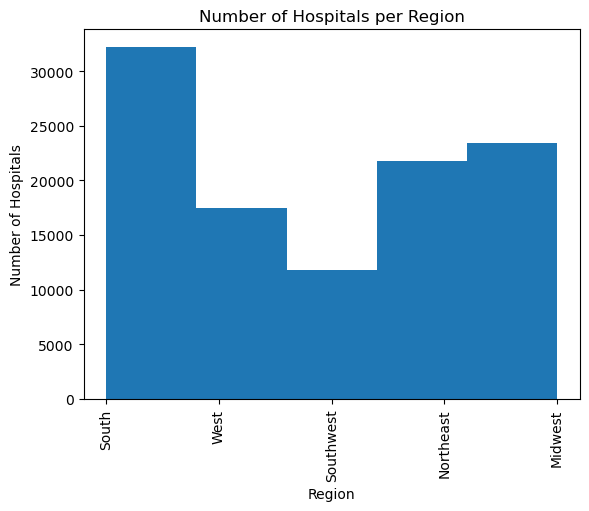

<Figure size 12000x12000 with 0 Axes>

In [167]:
histogram(region_table, 'Region', 5, "Region", "Number of Hospitals", "Number of Hospitals per Region")

*Distribution of Average Cost per Region* 

In [168]:
# converting
for row in range(region_table.row_count()):
    s = region_table[row]["Average Total Payments "]
    s = s.replace("$", "")
    s = region_table.convert_numeric(s)
    region_table[row]["Average Total Payments "] = s

In [169]:
# partition on state annd create averages
p_list = partition(region_table, ["Region"])

In [170]:
label = []
d = []
for p in p_list:
    vals = []
    name = p[0]["Region"]
    label.append(name)
    d.append(mean(p, "Average Total Payments "))
hospital_avg_prices_region = DataTable(['Region', 'Average Total Payments '])
for s in range(len(label)):
    hospital_avg_prices_region.append([label[s], d[s]])
print(hospital_avg_prices_region)

Region       Average Total Payments
---------  -------------------------
South                        8808.2
West                        11641.6
Southwest                    9260.86
Northeast                   10592.9
Midwest                      9289.14


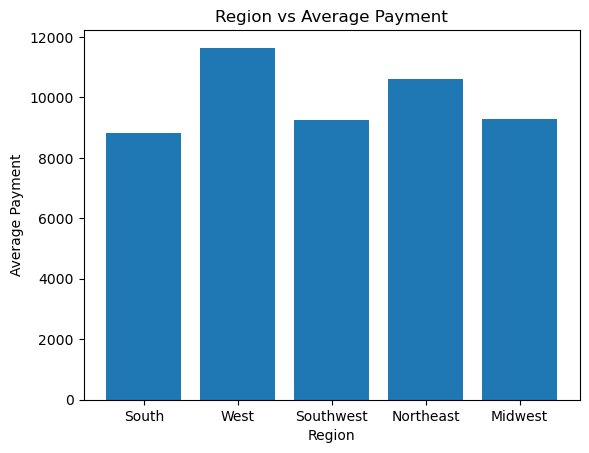

In [171]:
bar_chart(column_values(hospital_avg_prices_region, "Region"), column_values(hospital_avg_prices_region, "Average Total Payments "), "Region", "Average Payment", "Region vs Average Payment")

*Clusters of Average Payment per State*

> Will be using 7 clusters

In [183]:
state_dict = {}
dist_vals = distinct_values(region_table, "State")
for val in range(len(dist_vals)):
    state_dict[dist_vals[val]] = val

for row in region_table:
    row["State"] = state_dict[row["State"]]

label = []
d = []
p_list = partition(region_table, ["State"])
for p in p_list:
    vals = []
    name = p[0]["State"]
    label.append(name)
    d.append(mean(p, "Average Total Payments "))
hospital_avg_prices_state = DataTable(['State', 'Average Total Payments '])
for s in range(len(label)):
    hospital_avg_prices_state.append([label[s], d[s]])


In [190]:
centroids = select_k_random_centroids(hospital_avg_prices_state, 5)
clusters = k_means(hospital_avg_prices_state, centroids, ["State", "Average Total Payments "])
two_tss = tss(clusters, ['State', 'Average Total Payments '])
print(two_tss)

[263556.20873681677, 6132783.806235194, 220330.4435913842, 1035009.316574938, 633816.335084265]


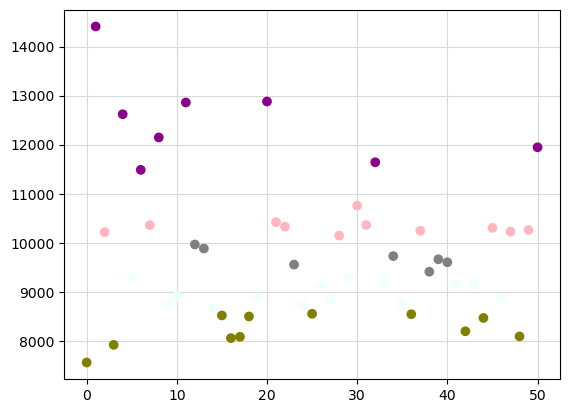

In [192]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

plt.figure()
plt.grid(color='0.85', zorder=0)

colors = list(mcolors.CSS4_COLORS.values())
shuffle(colors)
for c in range(len(clusters)):
   plt.scatter(column_values(clusters[c], 'State'), 
            column_values(clusters[c], 'Average Total Payments '), 
            c=colors[c], linestyle='', zorder=3)
plt.show()
plt.close()

For my classifier in predicitng the region in which a Hospital is placed I will be using the attributes 

# Data Cleaning and Preprocessing

3. Cleaning

* Dropping unecessary attributes

In [186]:
combined_table.drop(['Hospital Referral Region Description', 'Total Discharges', 'Average Covered Charges','Average Medicare Payments',
                     'Provider Id', 'County Name', 'Phone Number', 'Emergency Services', 
                     'Meets criteria for meaningful use of EHRs','Hospital overall rating footnote', 'Mortality national comparison', 
                     'Mortality national comparison footnote', 'Safety of care national comparison', 'Safety of care national comparison footnote', 
                     'Readmission national comparison', 'Readmission national comparison footnote', 'Patient experience national comparison', 
                     'Patient experience national comparison footnote', 'Effectiveness of care national comparison', 
                     'Effectiveness of care national comparison footnote', 'Timeliness of care national comparison', 'Timeliness of care national comparison footnote', 
                     'Efficient use of medical imaging national comparison', 'Efficient use of medical imaging national comparison footnote', 'ZIP Code',
                    "Address", "Provider ID", "City"])
print(combined_table.columns())

ValueError: list.remove(x): x not in list

* Remove Rows with Missing values in the overall rating section

In [ ]:
for row in range(combined_table.row_count()):
    if combined_table[row]['Hospital overall rating'] == 'Not Available':
        combined_table[row]['Hospital overall rating'] = ''
cleaned_table = remove_missing(combined_table, ['Hospital overall rating'])

* Replace missing values in the average total payment section

In [ ]:
# convert numeric
for row in range(cleaned_table.row_count()):
    temp = cleaned_table[row]['Average Total Payments ']
    temp = temp.replace('$', '')
    num = cleaned_table.convert_numeric(temp)
    cleaned_table[row]['Average Total Payments '] = num
# replace with average in the state
avg = lambda xs : None if not len(xs) else sum(xs) / len(xs)
cleaned_table = replace_missing(cleaned_table, 'Average Total Payments ', ['State'], avg)

* Normalize Average Payments

In [ ]:
normalize(cleaned_table, "Average Total Payments ")

3. Creating Region Attribute and dropping the state attribute

    > I am dropping the state attribute since there are too many different states to predict making it incredibly difficult to predict using a classifier. So dropping it and replacing it with region gives my classification approach more of a chance to predict it. Since instead of 50 different values to choose from it now has 5. 

* Creating region attribute

In [ ]:
state_to_region_dict = {
    'WA': 'West', 'OR': 'West', 'CA': 'West', 'NV': 'West',
    'ID': 'West', 'MT': 'West', 'WY': 'West', 'UT': 'West',
    'CO': 'West', 'AK': 'West', 'HI': 'West', 'ME': 'Northeast',
    'VT': 'Northeast', 'NY': 'Northeast', 'NH': 'Northeast',
    'MA': 'Northeast', 'RI': 'Northeast', 'CT': 'Northeast',
    'NJ': 'Northeast', 'PA': 'Northeast', 'ND': 'Midwest',
    'SD': 'Midwest', 'NE': 'Midwest', 'KS': 'Midwest',
    'MN': 'Midwest', 'IA': 'Midwest', 'MO': 'Midwest', 'WI': 'Midwest',
    'IL': 'Midwest', 'MI': 'Midwest', 'IN': 'Midwest', 'OH': 'Midwest',
    'WV': 'South', 'DC': 'South', 'MD': 'South',
    'VA': 'South', 'KY': 'South', 'TN': 'South', 'NC': 'South',
    'MS': 'South', 'AR': 'South', 'LA': 'South', 'AL': 'South',
    'GA': 'South', 'SC': 'South', 'FL': 'South', 'DE': 'South',
    'AZ': 'Southwest', 'NM': 'Southwest', 'OK': 'Southwest',
    'TX': 'Southwest'}
temp = cleaned_table.columns()
temp.append('Region')
hospital_region_table = DataTable(temp)
for row in range(cleaned_table.row_count()):
    state = cleaned_table[row]['State']
    region = state_to_region_dict[state]
    row = cleaned_table[row].values()
    row.append(region)
    hospital_region_table.append(row)

* Dropping State Attribute

In [ ]:
hospital_region_table.drop(['State'])

# Classifier Development